In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from collections import namedtuple

# Завдання 6


In [12]:
Task6Params = namedtuple('Task6Params', 'lam,a,b,x0')
Task6Result = namedtuple('Task6Result', 'nsteps, nhist, yhist, phist')
def Task6(params: Task6Params, stat_offset=2000, n_steps=2000, seed=42, debug=False):
    rng = np.random.default_rng(seed)
    lam,a,b,x0 = params

    N = x0
    n_history = []
    p_history = []
    y_history = []
    
    for step in range(n_steps+stat_offset):
        p = sp.stats.beta.rvs(x0+a,N-x0+b, random_state=rng)
        p_history.append(p)
        
        y = sp.stats.poisson.rvs(lam * (1-p), random_state=rng)
        y_history.append(y)
        
        N = x0 + y
        n_history.append(N)

    return Task6Result(n_steps, n_history, y_history, p_history)


In [13]:
params = Task6Params(
    lam=10, a=1, b=1, x0=7
)
res = Task6(params, stat_offset=0, n_steps=10000, seed=42)

In [17]:
print(f"Sample mean: {np.array(res.phist).mean()}")

Sample mean: 0.6856039404353976


Text(0.5, 1.0, 'Histogram for p')

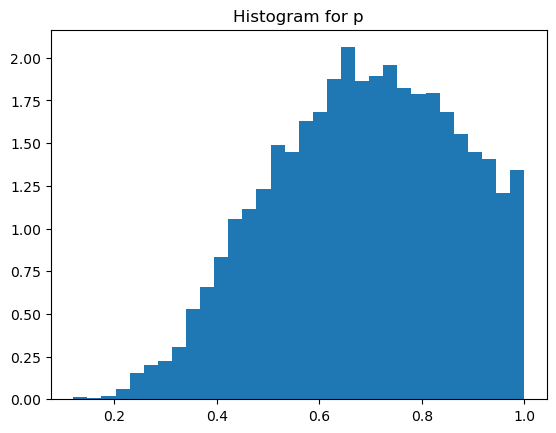

In [21]:
phist = np.array(res.phist)
nhist = np.array(res.nhist)
plt.hist(phist, 32, density=True)
plt.title("Histogram for p")

Text(0.5, 1.0, 'Histogram for N')

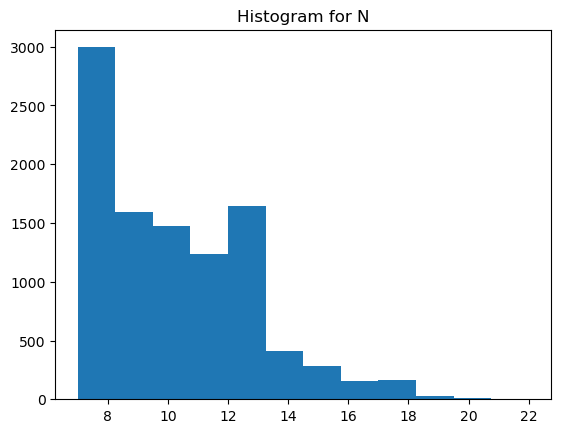

In [27]:
plt.hist(nhist, bins=12)
plt.title("Histogram for N")